## **빅데이터 처리 Final Project**
### 인하공업전문대학 컴퓨터정보과 3-B 202044036 김원준
* 이력서, 구인 공고, 지원 이력 데이터를 이용한 구인 공고 추천 알고리즘 개발
* DACON 제 1회 국민대학교 AI빅데이터 분석 경진대회 데이터 활용
* 데이터 설명 [링크](https://docs.google.com/spreadsheets/d/1rNQuOmfj3YWESN6ryAYsek9ukh8Jth9D/edit#gid=1276570507)
* 그 외 데이터 분석을 통한 시각화






#### Google Drive Mount

In [94]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Library Import

In [95]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

#### Data Set Load

In [96]:
# 이력서
resume_df = pd.read_csv('/content/drive/MyDrive/data/resume.csv')
# 채용정보
recruitment_df = pd.read_csv('/content/drive/MyDrive/data/recruitment.csv')
# 이력서 별 지원 이력
apply_train_df = pd.read_csv('/content/drive/MyDrive/data/apply_train.csv')
# 회사정보
company_df = pd.read_csv('/content/drive/MyDrive/data/company.csv')
# 이력서 학위
re_education_df = pd.read_csv('/content/drive/MyDrive/data/resume_education.csv')
# 이력서 언어능력
re_language_df = pd.read_csv('/content/drive/MyDrive/data/resume_language.csv')
# 이력서 자격증
re_certificate_df = pd.read_csv('/content/drive/MyDrive/data/resume_certificate.csv')

##### 이력서 데이터 확인

* resume_seq : 이력서 번호
* reg_date : 이력서 등록일
* update_data : 이력서 수정일
* degree : 최종학력
* graduate_date : 졸업 연도
* hope_salary : 희망 연봉
* last_salart : 최종 연봉(이전 연봉)
* text_keyword : 직무 키워드
* job_code_seq1 : 희망 직무 1
* job_code_seq2 : 희망 직무 2
* job_code_seq3 : 희망 직무 3
* career_month : 경력 월
* career_job_code : 경력 직무

In [97]:
resume_df.head(3)

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,job_code_seq2,job_code_seq3,career_month,career_job_code
0,U00606,2020-03-04,2020-05-22,4,2008,3500.0,3500.0,스타일디자이너;우븐디자이너,재료·화학·섬유·의복,NaN,NaN,67,NaN
1,U00509,2019-08-25,2020-09-02,2,0,0.0,3700.0,상품기획;MD;기획;머천다이저;머천다이징,재료·화학·섬유·의복,NaN,NaN,84,섬유;봉제;가방;의류
2,U02012,2017-11-20,2020-01-26,5,1979,3500.0,3100.0,니트디자인,재료·화학·섬유·의복,NaN,NaN,121,학교;학원;직원훈련(교육서비스)


##### 구인 공고 데이터 확인

* recruitment_seq : 공고 번호
* address_seq1 : 근무지 주소 코드 1
* address_seq2 : 근무지 주소 코드 2
* address_seq3 : 근무지 주소 코드 3
* career_end : 요구 최대 경력
* career_start : 요구 최소 경력
* check_box_keyword : 모집 직무 코드
* education : 요구 학위
* major_task : 주 업무 코드
* qualifications : 자격 요건 난이도
* text_keyword : 모집 직무 키워드

In [98]:
recruitment_df.head(3)

,recruitment_seq,address_seq1,address_seq2,address_seq3,career_end,career_start,check_box_keyword,education,major_task,qualifications,text_keyword
0,R02264,3.0,NaN,NaN,0,0,2507;2707;2810,4,8,1,NaN
1,R06317,3.0,NaN,NaN,0,0,2204;2205;2707,3,2,1,NaN
2,R04017,3.0,NaN,NaN,0,0,2101;2108;2201;2707,3,2,1,NaN


##### 지원 이력 데이터 확인

* resume_seq : 이력서 번호
* recruitment_seq : 공고 번호

In [99]:
apply_train_df.head(3)

,resume_seq,recruitment_seq
0,U05833,R03838
1,U06456,R02144
2,U07807,R01877


##### 회사 데이터 확인

* recruitment_seq : 공고 번호
* company_type_seq : 회사 유형 코드
* supply_kind : 주 업종 코드
* employee : 종업원 수

In [100]:
company_df.head(3)

,recruitment_seq,company_type_seq,supply_kind,employee
0,R02073,2,514,20
1,R03274,2,402,90
2,R02195,2,514,20


##### 이력서_학위 데이터 확인

* resume_seq : 이력서 번호
* hischool_type_seq : 고등학교 유형 코드
* hischool_special_type : 특수 고등학교 분류
* hischool_nation : 고등학교 공/사립 구분
* hischool_gender : 고등학교 남녀/공학 구분
* hischool_location_seq : 고등학교 지역 코드
* univ_type_seq1 : 최종대학(원)유형코드1
* univ_type_seq2 : 최종대학(원)유형코드2
* univ_transfer : 최종대학(원)편입여부(1:편입)
* univ_location : 최종대학(원)지역코드
* univ_major : 최종대학(원)전공
* univ_sub_major : 최종대학(원) 부 전공
* univ_major_type : 최종대학(원) 주 전공 계열 코드
* univ_score : 최종대학(원) 평균 평점

In [101]:
re_education_df.head(3)

,resume_seq,hischool_type_seq,hischool_special_type,hischool_nation,hischool_gender,hischool_location_seq,univ_type_seq1,univ_type_seq2,univ_transfer,univ_location,univ_major,univ_sub_major,univ_major_type,univ_score
0,U01419,21,일반고,사립,남자학교,3,5,5,0,3,NaN,NaN,9,60.0
1,U03375,21,일반고,사립,여자학교,3,5,5,0,3,NaN,NaN,4,80.0
2,U06523,21,일반고,사립,남여공학,3,5,5,0,3,NaN,NaN,8,70.0


##### 이력서_언어 데이터 확인

* resume_seq : 이력서 번호
* language : 외국어 코드
* exam_name : 공인 시험 코드
* score : 점수

In [102]:
re_language_df.head(3)

,resume_seq,language,exam_name,score
0,U01774,2,4,742.42
1,U04892,2,4,888.89
2,U01859,2,4,500.00


##### 이력서_자격증 데이터 확인

* resume_seq : 이력서 버호
* certificate_contents : 자격증 명

In [103]:
re_certificate_df.head(3)

,resume_seq,certificate_contents
0,U06421,손해보험사
1,U01278,2종운전면허증
2,U01008,자동차운전면허 2종 보통


#### 이력서 데이터 중 실제 이용할 데이터 추출

In [104]:
# 사용할 컬럼 추출
resume_df_ex = resume_df[['resume_seq', 'degree', 'hope_salary', 'job_code_seq1', 'career_month']]

# 'resume_seq' 이력서 번호를 인덱스로 지정
resume_df_ex.set_index(['resume_seq'], inplace=True)

###### 직무 코드 결측치가 존재하지 않는다.


In [105]:
# 직무 코드 확인
print(resume_df['job_code_seq1'].value_counts())
print('-'*20)
print(resume_df['job_code_seq1'].isnull().sum())

재료·화학·섬유·의복    7288
디자인             536
경영·기획·회계·사무     489
영업·판매·TM        158
건설·기계·전기·전자       5
전문·교육·자격          3
기타 직종             1
IT·게임             1
문화·예술·신문·방송       1
Name: job_code_seq1, dtype: int64
--------------------
0


In [106]:
# job_code_seq1 데이터 치환 (TF-IDF 이용 가능)
job_labels = {
    "재료·화학·섬유·의복": 1,
    "디자인": 2,
    "경영·기획·회계·사무": 3,
    "영업·판매·TM": 4,
    "건설·기계·전기·전자": 5,
    "전문·교육·자격": 6,
    "기타 직종": 7,
    "IT·게임": 8,
    "문화·예술·신문·방송": 9
}

resume_df_ex['job_code_seq1'] = resume_df_ex['job_code_seq1'].map(job_labels)

resume_df_ex.head()

<ipython-input-106-a9ed41952481>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df_ex['job_code_seq1'] = resume_df_ex['job_code_seq1'].map(job_labels)


,degree,hope_salary,job_code_seq1,career_month
resume_seq,,,,
U00606,4,3500.0,1,67
U00509,2,0.0,1,84
U02012,5,3500.0,1,121
U04599,4,0.0,1,24
U07573,4,1900.0,1,0


In [107]:
# 희망 연봉 확인
print(resume_df['hope_salary'].value_counts())

0.0        4963
2300.0      298
2500.0      287
2100.0      248
2700.0      239
2900.0      236
3100.0      224
3300.0      218
3500.0      185
3700.0      181
1900.0      170
3900.0      159
4100.0      141
5250.0      115
4300.0      103
4500.0      101
5750.0      100
4900.0       94
1700.0       77
4700.0       73
6250.0       57
1500.0       57
6750.0       44
7500.0       43
1300.0       28
1100.0       12
8500.0       12
1000.0        7
9500.0        6
10000.0       4
Name: hope_salary, dtype: int64


In [108]:
# 희망 연봉에 대한 데이터가 존재하지 않거나, 0 인경우 NaN 으로 변경한 뒤 평균 값으로 치환
resume_df_ex['hope_salary'].replace(0.0, np.nan, inplace=True)

hope_salary_mean = resume_df_ex['hope_salary'].mean()

resume_df_ex['hope_salary'].fillna(hope_salary_mean, inplace=True)

print('희망 연봉 평균 : ',hope_salary_mean)
print(resume_df_ex.head())

희망 연봉 평균 :  3362.6598465473144
            degree  hope_salary  job_code_seq1  career_month
resume_seq                                                  
U00606           4  3500.000000              1            67
U00509           2  3362.659847              1            84
U02012           5  3500.000000              1           121
U04599           4  3362.659847              1            24
U07573           4  1900.000000              1             0


<ipython-input-108-30d0b0045467>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df_ex['hope_salary'].replace(0.0, np.nan, inplace=True)
<ipython-input-108-30d0b0045467>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume_df_ex['hope_salary'].fillna(hope_salary_mean, inplace=True)


#### 구인 공고 데이터 중 실제 이용할 데이터 추출

In [109]:
# 구인 공고 데이터 recruitment_df_ex
# 사용할 열 추출
recruitment_df_ex = recruitment_df[['recruitment_seq', 'address_seq1', 'education', 'major_task', 'qualifications']]

# 'resume_seq' 이력서 번호를 인덱스로 지정
recruitment_df_ex.set_index(['recruitment_seq'], inplace=True)


###### 주소 코드 데이터에서 결측치가 존재한다.

In [110]:
# 근무지 주소 코드 데이터 결측치 확인
print(recruitment_df_ex['address_seq1'].isnull().sum())

1


##### 결측치가 나온 데이터를 0으로 치환한다.
##### 가정) 0 : 지역 설정 X

In [111]:
# address_seq1 컬럼중 NaN 값을 0으로 치환  가정) 0 : 지역 설정 X
print('NaN count : ', recruitment_df_ex['address_seq1'].isnull().sum())
recruitment_df_ex['address_seq1'].fillna(0, inplace=True)
print(recruitment_df_ex['address_seq1'].value_counts())

NaN count :  1
3.0     6490
5.0      174
20.0      17
11.0       5
1.0        4
13.0       2
9.0        1
0.0        1
2.0        1
Name: address_seq1, dtype: int64


<ipython-input-111-1aa5d5fd570c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recruitment_df_ex['address_seq1'].fillna(0, inplace=True)


#### 정규화 Min-Max Scaling

In [112]:
# 각 열의 최소값과 범위 계산
min_address = recruitment_df_ex['address_seq1'].min()
range_address = recruitment_df_ex['address_seq1'].max() - min_address

min_education = recruitment_df_ex['education'].min()
range_education = recruitment_df_ex['education'].max() - min_education

min_major_task = recruitment_df_ex['major_task'].min()
range_major_task = recruitment_df_ex['major_task'].max() - min_major_task

min_qualifications = recruitment_df_ex['qualifications'].min()
range_qualifications = recruitment_df_ex['qualifications'].max() - min_qualifications

# 각 열을 정규화
recruitment_df_ex['address_seq1'] = (recruitment_df_ex['address_seq1'] - min_address) / range_address
recruitment_df_ex['education'] = (recruitment_df_ex['education'] - min_education) / range_education
recruitment_df_ex['major_task'] = (recruitment_df_ex['major_task'] - min_major_task) / range_major_task
recruitment_df_ex['qualifications'] = (recruitment_df_ex['qualifications'] - min_qualifications) / range_qualifications

# 결과 출력
recruitment_df_ex.head()

<ipython-input-112-b4f29766b86c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recruitment_df_ex['address_seq1'] = (recruitment_df_ex['address_seq1'] - min_address) / range_address
<ipython-input-112-b4f29766b86c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recruitment_df_ex['education'] = (recruitment_df_ex['education'] - min_education) / range_education
<ipython-input-112-b4f29766b86c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,address_seq1,education,major_task,qualifications
recruitment_seq,,,,
R02264,0.15,0.50,0.777778,0.5
R06317,0.15,0.25,0.111111,0.5
R04017,0.15,0.25,0.111111,0.5
R02865,0.15,0.00,0.111111,0.5
R04890,0.15,0.00,0.111111,1.0


##### check_box_keyword(모집 직무 코드) 같은 경우 구인 공고 간 유사성을 계산하는데 중요한 척도가 될 것으로 판단하여 추가하여 진행


In [113]:
check_box_keyword_df = recruitment_df[['recruitment_seq','check_box_keyword']]

check_box_keyword_df.set_index(['recruitment_seq'], inplace=True)

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(check_box_keyword_df['check_box_keyword'])

tfidf_check_box_keyword = pd.DataFrame(tfidf_matrix.toarray(), index=check_box_keyword_df.index)

tfidf_check_box_keyword

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
recruitment_seq,,,,,,,,,,,,,,,,,,,,,
R02264,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R06317,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R04017,0.543597,0.0,0.0,0.0,0.0,0.0,0.0,0.641246,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R02865,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R04890,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R03678,0.432782,0.0,0.0,0.0,0.0,0.0,0.0,0.510525,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R04593,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R03252,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### 모집 직무 코드를 TF-IDF 벡터화 한 결과를 concat()을 이용해서 연결

In [114]:
final_df = pd.concat([recruitment_df_ex, tfidf_check_box_keyword], axis=1)

# recruitment_seq을 기준으로 정렬
final_df.sort_index(inplace=True)

final_df

,address_seq1,education,major_task,qualifications,0,1,2,3,4,5,...,51,52,53,54,55,56,57,58,59,60
recruitment_seq,,,,,,,,,,,,,,,,,,,,,
R00001,0.25,0.00,0.111111,0.5,0.352640,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R00002,0.15,0.25,0.111111,0.5,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R00003,0.15,0.25,0.111111,1.0,0.543597,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R00004,0.15,0.25,0.111111,0.5,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R00005,0.15,0.25,0.111111,0.5,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R06691,0.15,0.25,0.111111,0.5,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R06692,0.15,0.25,0.111111,1.0,0.000000,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R06693,0.25,0.50,0.111111,0.5,0.000000,0.97663,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### 구인 공고 간 유사성 계산 진행, 코사인 유사도 계산 기법(cosine similarity)으로 진행

In [115]:
# 구인 공고 간 유사성 계산
recruitment_sim = cosine_similarity(final_df)

recruitment_scores = pd.DataFrame(recruitment_sim, columns=recruitment_df_ex.index, index=recruitment_df_ex.index)

recruitment_scores.sort_index(inplace=True)
recruitment_scores.sort_index(axis=1, inplace=True)

recruitment_scores

recruitment_seq,R00001,R00002,R00003,R00004,R00005,R00006,R00007,R00008,R00009,R00010,...,R06686,R06687,R06688,R06689,R06690,R06691,R06692,R06693,R06694,R06695
recruitment_seq,,,,,,,,,,,,,,,,,,,,,
R00001,1.000000,0.643911,0.610877,0.383808,0.539821,0.755788,0.639649,0.515537,0.610877,0.616407,...,0.410202,0.521654,0.571955,0.682407,0.356821,0.536034,0.578384,0.584325,0.586808,0.373071
R00002,0.643911,1.000000,0.566397,0.336728,0.673432,0.790456,0.842577,0.650476,0.566397,0.698384,...,0.671859,0.802086,0.716177,0.920285,0.421513,0.362595,0.906113,0.523455,0.458721,0.410008
R00003,0.610877,0.566397,1.000000,0.626706,0.589439,0.778871,0.710226,0.657181,1.000000,0.662843,...,0.462962,0.441079,0.629055,0.586931,0.361272,0.431417,0.591196,0.548077,0.943707,0.404151
R00004,0.383808,0.336728,0.626706,1.000000,0.440647,0.398912,0.335930,0.414072,0.626706,0.387249,...,0.357038,0.332045,0.452281,0.343939,0.769314,0.299064,0.345437,0.346946,0.588596,0.289867
R00005,0.539821,0.673432,0.589439,0.440647,1.000000,0.559741,0.475878,0.498565,0.589439,0.787013,...,0.880616,0.752707,0.919987,0.486441,0.603769,0.427257,0.718001,0.580751,0.521282,0.536850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R06691,0.536034,0.362595,0.431417,0.299064,0.427257,0.379667,0.362377,0.212545,0.431417,0.320185,...,0.312104,0.305279,0.439917,0.364564,0.218159,1.000000,0.364973,0.309178,0.315689,0.293760
R06692,0.578384,0.906113,0.591196,0.345437,0.718001,0.690155,0.725328,0.585971,0.591196,0.765013,...,0.736991,0.889144,0.766193,0.784596,0.458330,0.364973,1.000000,0.560632,0.484999,0.431054
R06693,0.584325,0.523455,0.548077,0.346946,0.580751,0.628584,0.451869,0.482488,0.548077,0.691648,...,0.501991,0.562240,0.617371,0.475338,0.431946,0.309178,0.560632,1.000000,0.580770,0.380848


##### apply_train_df(지원 이력 데이터)를 토대로 지원을 했으면 1, 지원하지 않았다면 0으로 행렬 생성

In [116]:
# 사용자-아이템 행렬 생성: 구직자가 해당 채용 공고에 지원했으면 1, 아니면 0으로 설정
user_item_matrix = apply_train_df.groupby(['resume_seq', 'recruitment_seq']).size().unstack(fill_value=0)
user_item_matrix[user_item_matrix > 1] = 1

user_item_matrix.T

resume_seq,U00001,U00002,U00003,U00004,U00005,U00006,U00007,U00008,U00009,U00010,...,U08473,U08474,U08475,U08476,U08477,U08478,U08479,U08480,U08481,U08482
recruitment_seq,,,,,,,,,,,,,,,,,,,,,
R00001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R00002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R00003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R00004,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R00005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R06691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R06692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R06693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### 유사도 계산한 결과를 토대로 유사도가 가장 높은 10개의 데이터 추출

In [117]:
def recall10():
    length = recruitment_scores.shape[0]
    tmp_dict = {}

    for i in range(length):
        col_name = 'R' + str(i + 1).zfill(5)   # 컬럼 이름 생성
        list_of_rec = recruitment_scores[col_name].nlargest(30).index.to_list()

        if col_name in list_of_rec:
            list_of_rec.remove(col_name)

        #selected_rec = random.sample(list_of_rec, 10)

        tmp_dict[col_name] = list_of_rec[:10]

    return tmp_dict

result_dict = recall10()
recall_top10_df = pd.DataFrame(result_dict)

In [118]:
recall_top10_df

,R00001,R00002,R00003,R00004,R00005,R00006,R00007,R00008,R00009,R00010,...,R06686,R06687,R06688,R06689,R06690,R06691,R06692,R06693,R06694,R06695
0,R01618,R02807,R00009,R00119,R00365,R00035,R00104,R03638,R00003,R00584,...,R00021,R01970,R00110,R00024,R00031,R03969,R02275,R03006,R00113,R04518
1,R01428,R03056,R00057,R00174,R00588,R00066,R00205,R05453,R00057,R00774,...,R00025,R03290,R00154,R00046,R00044,R03263,R02792,R04253,R00157,R06210
2,R00641,R03360,R00201,R00189,R00767,R00146,R00209,R06363,R00201,R01670,...,R00059,R03734,R00301,R00072,R00224,R06397,R06074,R05958,R00218,R06400
3,R01671,R04710,R00280,R00378,R01488,R00235,R00232,R05973,R00280,R02053,...,R00060,R04480,R00306,R00105,R00277,R00670,R06149,R06570,R00222,R04479
4,R04395,R05025,R00465,R00685,R01602,R00287,R00259,R06227,R00465,R06058,...,R00062,R04653,R00512,R00156,R00615,R02951,R06613,R04307,R00681,R04118
5,R05510,R05930,R00610,R00832,R04043,R00302,R00289,R06650,R00610,R06094,...,R00089,R05770,R00522,R00159,R00957,R03165,R00211,R04532,R00741,R05964
6,R05612,R06023,R00708,R00938,R04165,R00331,R00337,R01486,R00708,R01300,...,R00097,R02391,R00525,R00185,R00980,R00012,R00372,R06385,R00913,R04392
7,R04422,R01139,R00739,R01358,R00580,R00349,R00338,R05499,R00739,R05358,...,R00102,R01854,R00669,R00225,R01244,R05592,R00505,R02629,R01078,R04929
8,R06350,R01998,R00868,R01366,R00818,R00433,R00402,R00346,R00868,R06362,...,R00114,R03179,R00705,R00226,R01267,R04876,R00578,R03302,R01362,R02455
9,R02338,R04066,R00903,R01455,R01435,R00555,R00405,R00515,R00903,R04593,...,R00126,R04335,R00706,R00305,R01284,R06107,R01796,R05984,R01489,R06305


##### 이력서 별로 지원한 공고 데이터를 딕셔너리 생성

In [119]:
list_of_selected = {}
for index, row in user_item_matrix.iterrows():
    list_of_selected[index] = row[row == 1].index.tolist()

list_of_selected['U00001']

['R04536', 'R05210', 'R05288', 'R06065']

##### 지원 이력이 있는 공고를 제외하고 나머지 10개 중 랜덤하게 5개 선택

In [120]:
#11/18

import random

def recommend5():
    length = resume_df_ex.shape[0]
    tmp_list = []
    for i in range(length):
        col_name2 = 'U' + str(i + 1).zfill(5)  # 이력서 번호 생성
        if col_name2 in list_of_selected:  # 이미 지원한 이력서인 경우
            selected_recruitments = list_of_selected[col_name2]
            other_recruitments = [col for col in recall_top10_df.columns if col not in selected_recruitments]
            selected_rec = random.sample(other_recruitments, 5)  # 다른 공고 중에서 5개 랜덤 선택
        else:
            selected_rec = random.sample(recall_top10_df.columns.to_list(), 5)  # 랜덤으로 5개 선택

        for rec in selected_rec :
          tmp_list.append([col_name2, rec])

    return tmp_list

recommend_5 = recommend5()
recommend_5_df = pd.DataFrame(recommend_5, columns=['resume_seq', 'recruitment_seq'])

recommend_5_df

,resume_seq,recruitment_seq
0,U00001,R06523
1,U00001,R00416
2,U00001,R04632
3,U00001,R02326
4,U00001,R01700
...,...,...
42405,U08482,R00866
42406,U08482,R03452
42407,U08482,R00992
42408,U08482,R00065


In [121]:
recommend_5_df.to_csv('sample_submission.csv', index=False)

### **EDA**

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

> reg_date (이력서 등록일)

In [123]:
# 결측값 여부 확인
missing_values = resume_df['reg_date'].isnull().sum()

# 최소 일자 및 최대 일자 확인
min_date = resume_df['reg_date'].min()
max_date = resume_df['reg_date'].max()

print('결측 여부 : ', missing_values)
print('최소 일자 : ', min_date)
print('최대 일자 : ', max_date)

결측 여부 :  0
최소 일자 :  2000-10-15
최대 일자 :  2020-12-31


*   'reg_date'의 결측 치는 0이다.
*   'reg_date'는 2000-10-15 ~ 2020-12-31 까지의 데이터이다.



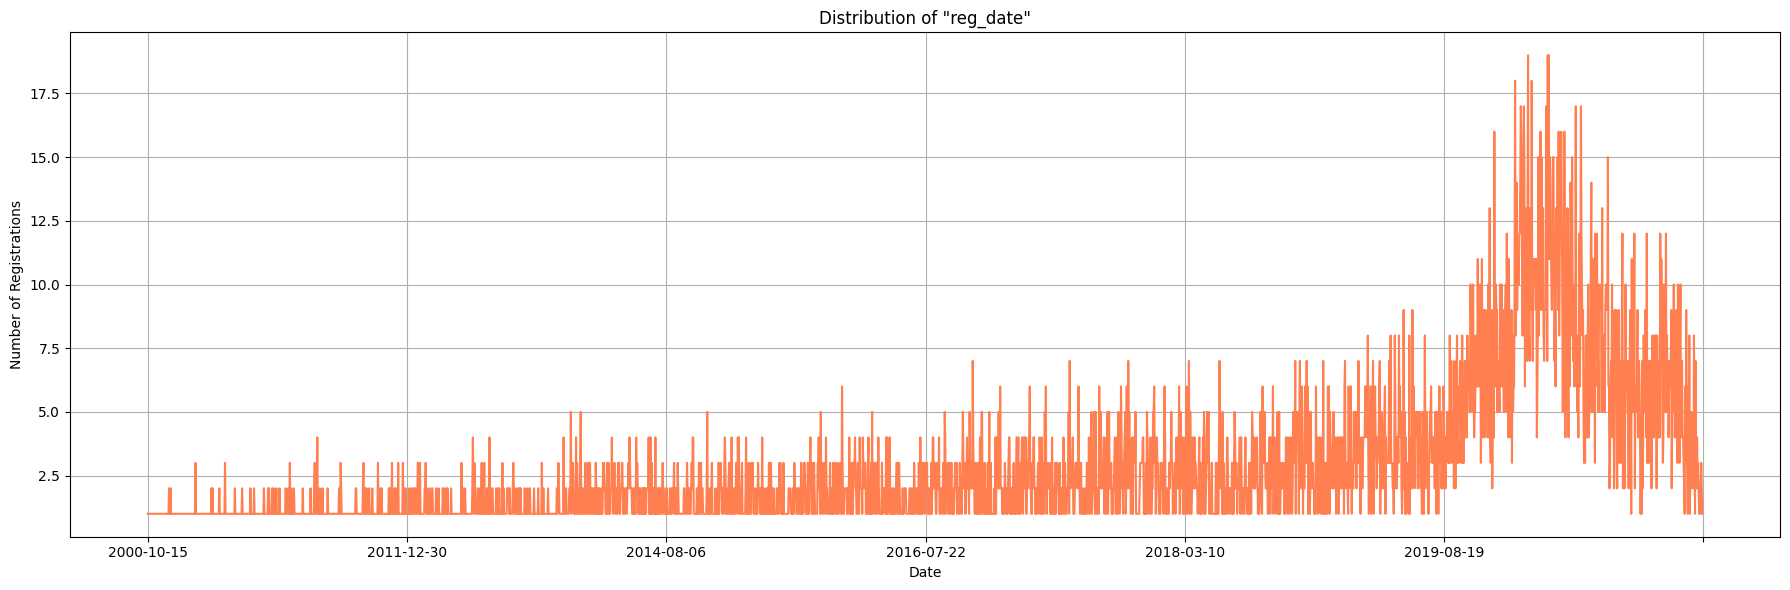

In [124]:
plt.figure(figsize=(18, 6))
resume_df['reg_date'].value_counts().sort_index().plot(color='coral')
plt.title('Distribution of "reg_date"')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.tight_layout()
plt.show()

* 'reg_date'의 분포를 보면 2019년도에서 2020년 사이 이력서 등록량이 늘어난 것을 알 수 있다.

> degree (최종 학력)

In [125]:
# 결측값 여부 확인
missing_values2 = resume_df['degree'].isnull().sum()

# 고유 값 확인
range_values2 = resume_df['degree'].value_counts()

print('결측 여부 : ', missing_values2)
print(range_values2)

결측 여부 :  0
4    7453
3     463
5     349
2     211
6       6
Name: degree, dtype: int64


*   'degree'의 결측 치는 0이다.
*   'degree'의 고유 값은 2, 3, 4, 5, 6 총 5개로 구성되어 있다.


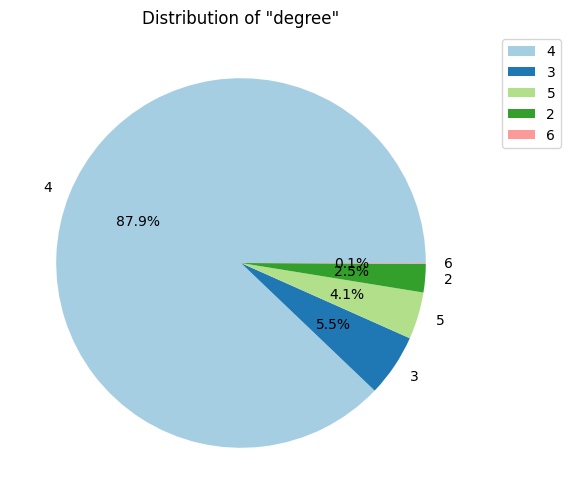

In [126]:
plt.figure(figsize=(12, 6))

cmap = plt.get_cmap("Paired")

plt.title('Distribution of "degree"')

degree_counts = resume_df['degree'].value_counts()

plt.pie(degree_counts, labels=degree_counts.index, autopct='%1.1f%%', colors=cmap(np.arange(len(degree_counts))))

plt.legend(degree_counts.index, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

* 'degree'의 데이터를 살펴보면 최종학력이 '4'를 가진 이력서가 약 88%로 비중이 가장 크다.

> hope_salary(희망 연봉)

In [127]:
# 결측값 여부 확인
missing_values3 = resume_df['hope_salary'].isnull().sum()

# 고유 값 확인
range_values3 = resume_df['hope_salary'].value_counts()

print('결측 여부 : ', missing_values3)
print(range_values3)

결측 여부 :  0
0.0        4963
2300.0      298
2500.0      287
2100.0      248
2700.0      239
2900.0      236
3100.0      224
3300.0      218
3500.0      185
3700.0      181
1900.0      170
3900.0      159
4100.0      141
5250.0      115
4300.0      103
4500.0      101
5750.0      100
4900.0       94
1700.0       77
4700.0       73
6250.0       57
1500.0       57
6750.0       44
7500.0       43
1300.0       28
1100.0       12
8500.0       12
1000.0        7
9500.0        6
10000.0       4
Name: hope_salary, dtype: int64


In [128]:
resume_df['hope_salary'].replace(0.0, np.nan, inplace=True)

hope_salary_mean = resume_df['hope_salary'].mean()

resume_df['hope_salary'].fillna(hope_salary_mean, inplace=True)

*   'hope_salary'의 결측 치는 0이다.
*   'hope_salary'의 결측 치는 0이지만 데이터가 4963개의 데이터가 0을 가지고 있다
* 0을 가진 데이터를 평균 데이터로 치환하여 분석한다.

hope_salary average :  3362.6598465473144


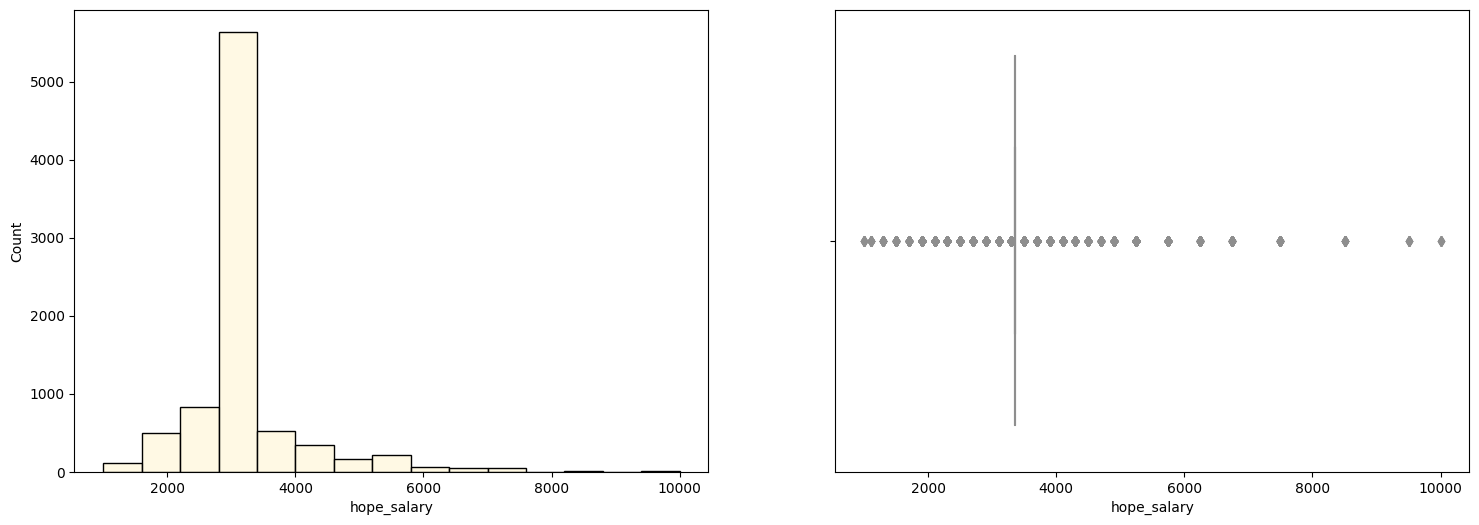

In [129]:
fig=plt.figure(figsize=(18,6))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)


sns.histplot(data=resume_df, x='hope_salary', ax=ax1, color='cornsilk')
sns.boxplot(data=resume_df, x='hope_salary', ax=ax2, color='cornsilk')
print('hope_salary average : ', hope_salary_mean)

* hope_salary(희망 연봉) 데이터가 0.0인 데이터가 약 5000개 정도이기 때문에 정확한 지표를 나타내기엔 무리가 있다.
* 평균 희망 연봉은 3363 정도로 보인다.
* 분포된 희망 연봉에 비해 비정상적으로 높은 연봉을 원하는 경우가 있다.

* hope_salary(희망 연봉)의 데이터가 0.0인 행을 제외

<Axes: xlabel='hope_salary'>

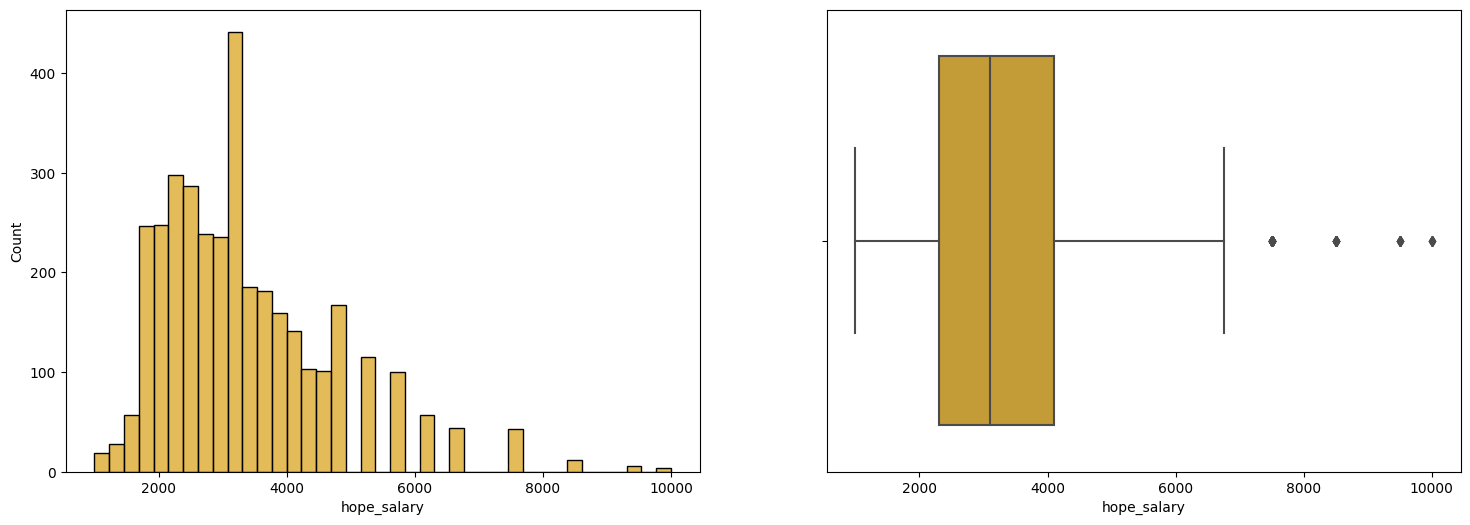

In [130]:
resume_df_1 = pd.read_csv('/content/drive/MyDrive/data/resume.csv')

noZero_hope_salary = resume_df_1[resume_df_1['hope_salary'] > 0]

fig=plt.figure(figsize=(18,6))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)


sns.histplot(data=noZero_hope_salary, x='hope_salary', ax=ax1, color='goldenrod')
sns.boxplot(data=noZero_hope_salary, x='hope_salary', ax=ax2, color='goldenrod')

* 위 그래프와 별 차이 없이 hope_salary(희망 연봉) 2000~4000사이의 희망 연봉을 원하는 지원자가 가장 많은 것을 알 수 있다.

> job_code_seq1 (희망 직무)

In [131]:
# 결측값 여부 확인
missing_values4 = resume_df['job_code_seq1'].isnull().sum()

# 고유 값 확인
range_values4 = resume_df['job_code_seq1'].value_counts()

print('결측 여부 : ', missing_values4)
print(range_values4)

결측 여부 :  0
재료·화학·섬유·의복    7288
디자인             536
경영·기획·회계·사무     489
영업·판매·TM        158
건설·기계·전기·전자       5
전문·교육·자격          3
기타 직종             1
IT·게임             1
문화·예술·신문·방송       1
Name: job_code_seq1, dtype: int64


In [132]:
english_labels = {
    "재료·화학·섬유·의복": "Materials/Chemicals/Fiber/Clothing",
    "디자인": "Design",
    "경영·기획·회계·사무": "Management/Planning/Accounting/Admin",
    "영업·판매·TM": "Sales",
    "건설·기계·전기·전자": "Construction/Machinery/Electrical/Electronics",
    "전문·교육·자격": "Specialty/Education/Qualification",
    "기타 직종": "Other Jobs",
    "IT·게임": "IT/Game",
    "문화·예술·신문·방송": "Culture/Art/Newspaper/Broadcast"
}

# 한글 라벨을 영어로 변환
resume_df['job_code_seq1_english'] = resume_df['job_code_seq1'].map(english_labels)
print(resume_df['job_code_seq1_english'])

0       Materials/Chemicals/Fiber/Clothing
1       Materials/Chemicals/Fiber/Clothing
2       Materials/Chemicals/Fiber/Clothing
3       Materials/Chemicals/Fiber/Clothing
4       Materials/Chemicals/Fiber/Clothing
                       ...                
8477    Materials/Chemicals/Fiber/Clothing
8478    Materials/Chemicals/Fiber/Clothing
8479                                Design
8480    Materials/Chemicals/Fiber/Clothing
8481    Materials/Chemicals/Fiber/Clothing
Name: job_code_seq1_english, Length: 8482, dtype: object


* 'job_code_seq1'의 결측치는 0이다.
* 한글 폰트가 제대로 나오지 않을 수 있으니 영어로 라벨링하여 시각화 한다.

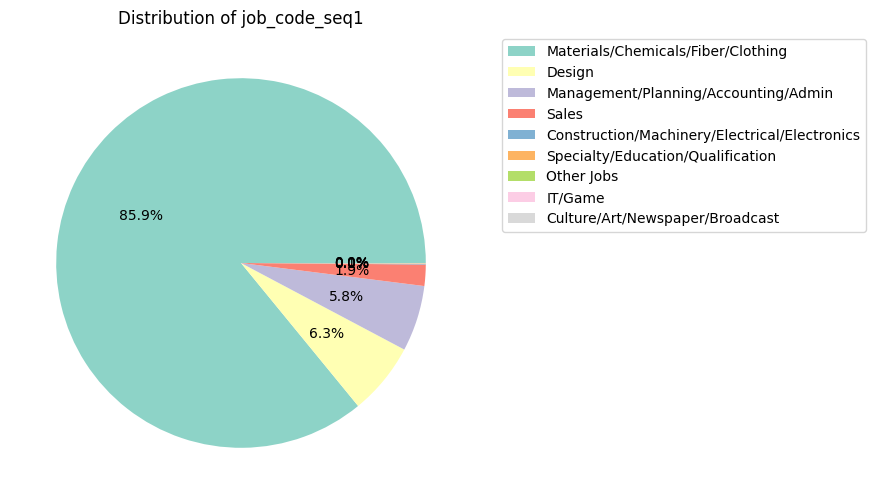

In [133]:
plt.figure(figsize=(6, 6))

cmap = plt.get_cmap("Set3")

plt.title('Distribution of job_code_seq1')

jcs_counts = resume_df['job_code_seq1_english'].value_counts()

plt.pie(jcs_counts, autopct='%1.1f%%', labels=None, colors=cmap(np.arange(len(jcs_counts))))

plt.legend(jcs_counts.index, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

* 분포를 확인해보면 '재료·화학·섬유·의복'을 희망하는 비율이 86%로 다른 희망 직무에 비해 인기가 많은 직무로 보인다.

> career_month (경력 월)

In [134]:
# 결측값 여부 확인
missing_values5 = resume_df['career_month'].isnull().sum()

# 고유 값 확인
range_values5 = resume_df['career_month'].value_counts()

print('결측 여부 : ', missing_values5)
print(range_values5)

결측 여부 :  0
0      1095
36      258
12      237
24      230
48      215
       ... 
262       1
294       1
399       1
432       1
245       1
Name: career_month, Length: 295, dtype: int64


* 0-12개월 13-24개월 25-36개월 37-48개월 49-60개월 61개월 이상 범위로 분류

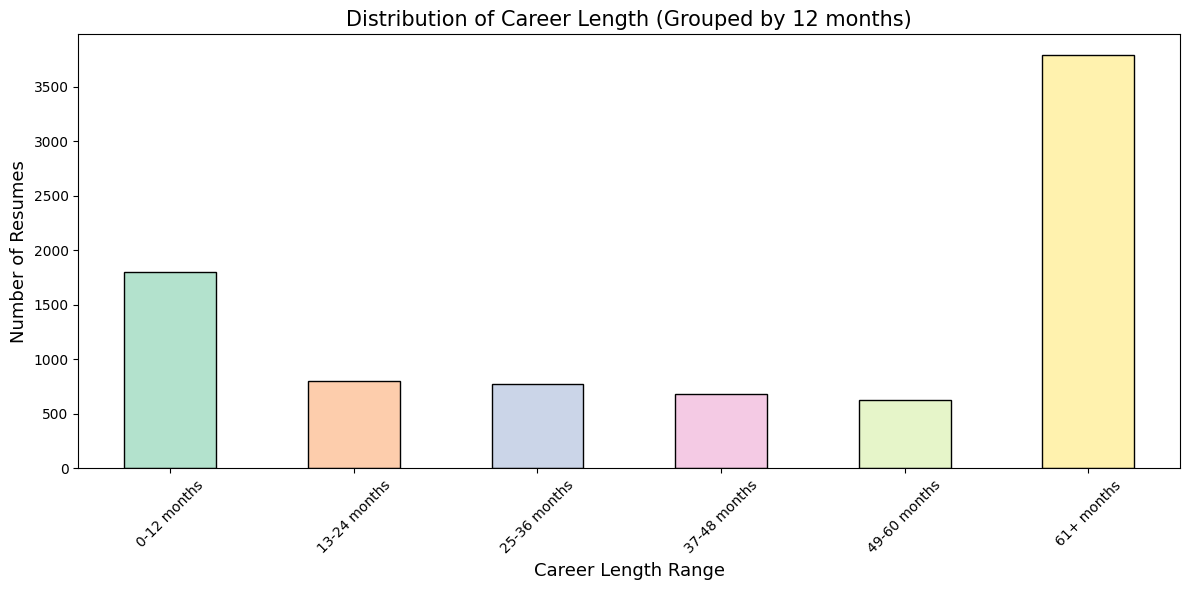

In [135]:
# 12개월을 범위로 career_month 컬럼의 값을 분류
bins = [-1, 12, 24, 36, 48, 60, resume_df['career_month'].max()]
labels = ['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61+ months']

# pd.cut을 사용하여 범위별로 분류
resume_df['career_month_range'] = pd.cut(resume_df['career_month'], bins=bins, labels=labels)

# 각 범위별 빈도수 확인
career_month_range_counts = resume_df['career_month_range'].value_counts().sort_index()

# 바 그래프로 시각화
plt.figure(figsize=(12, 6))
career_month_range_counts.plot(kind='bar', color=sns.color_palette('Pastel2'), edgecolor='black')

# 그래프 설정
plt.title('Distribution of Career Length (Grouped by 12 months)', fontsize=15)
plt.xlabel('Career Length Range', fontsize=13)
plt.ylabel('Number of Resumes', fontsize=13)
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()

* 5년차 이상의 지원자가 가장 많은 것을 알 수 있다.

> address_seq1 (근무지 주소 코드)

In [136]:
# 결측값 여부 확인
missing_values6 = recruitment_df['address_seq1'].isnull().sum()

# 고유 값 확인
range_values6 = recruitment_df['address_seq1'].value_counts()

print('결측 여부 : ', missing_values6)
print(range_values6)

결측 여부 :  1
3.0     6490
5.0      174
20.0      17
11.0       5
1.0        4
13.0       2
9.0        1
2.0        1
Name: address_seq1, dtype: int64


In [137]:
recruitment_df['address_seq1'].fillna(0, inplace=True)
recruitment_df['address_seq1'].value_counts()

3.0     6490
5.0      174
20.0      17
11.0       5
1.0        4
13.0       2
9.0        1
0.0        1
2.0        1
Name: address_seq1, dtype: int64

* 'address_seq1'의 결측 치가 존재한다.
* 해당 값을 0으로 치환 하여 분석한다.
* 가정1) 0 : 지역 설정 X

<Axes: xlabel='address_seq1', ylabel='count'>

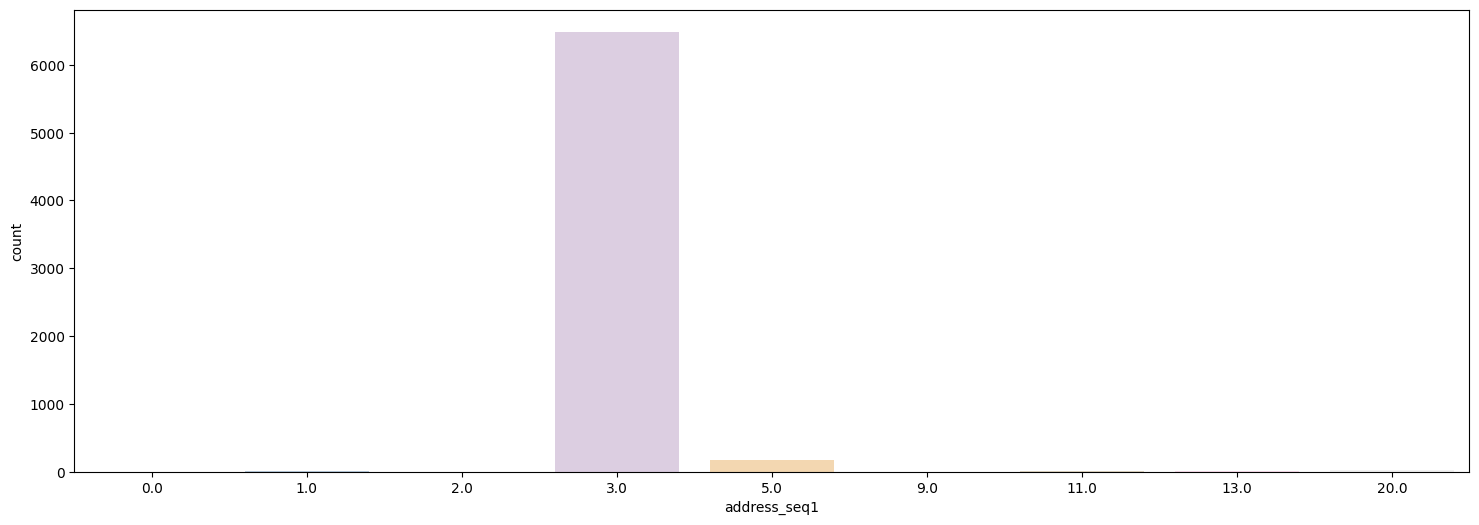

In [138]:
fig=plt.figure(figsize=(18,6))

sns.countplot(data=recruitment_df, x='address_seq1', palette='Pastel1')

* '3'지역 코드에 대한 구인 공고가 타 지역 코드에 비해 월등히 많은 것을 알 수 있다.

> apply_train (지원 이력)

* 지원 이력을 바탕으로 인기 있는(지원을 많이한) 구인 공고 10개 추출

In [139]:
test_df = apply_train_df.copy()

grouped = test_df.groupby(['recruitment_seq'])
grouped_counts = grouped.size().sort_values(ascending=False)
top_10_groups = grouped_counts.head(10)
top_10_groups

recruitment_seq
R03237    78
R01214    69
R00773    61
R00056    61
R00944    60
R04066    58
R04200    57
R00559    54
R03939    49
R01331    48
dtype: int64

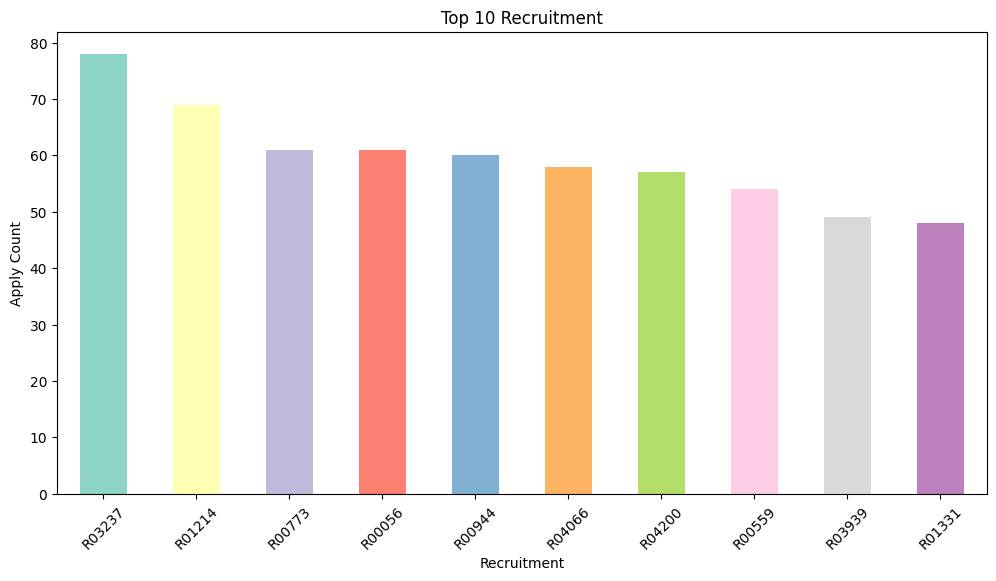

In [140]:
plt.figure(figsize=(12, 6))

top_10_groups.plot(kind='bar', color=sns.color_palette('Set3'))
plt.title('Top 10 Recruitment')
plt.xlabel('Recruitment')
plt.ylabel('Apply Count')
plt.xticks(rotation=45)
plt.show()

* 가장 많이 지원한 구인 공고는 'R03237'이다.
* 가장 많이 지원한 10개의 구인 공고 지원 수는 큰 차이가 없다.

##### Q1) degree(최종 학력)이 높을 수록 hope_salary(희망 연봉)가 높은가?

<Axes: xlabel='degree', ylabel='hope_salary'>

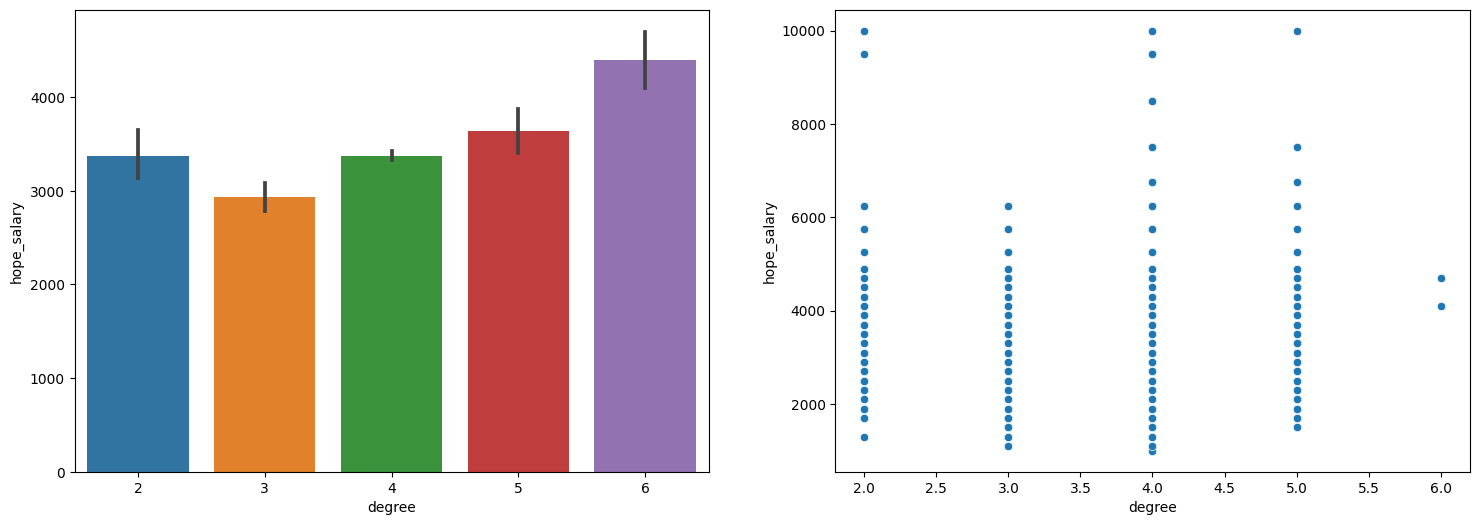

In [141]:
resume_df_1 = pd.read_csv('/content/drive/MyDrive/data/resume.csv')

noZero_hope_salary = resume_df_1[resume_df_1['hope_salary'] > 0]

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.barplot(data=noZero_hope_salary, x='degree', y='hope_salary', ax=ax1)
sns.scatterplot(data=noZero_hope_salary, x='degree', y='hope_salary', ax=ax2)

* 만약 최종 학력이 2, 3, 4, 5, 6 순이라면, 최종 학력이 높을 수록 희망 연봉이 높다는 것을 알 수 있다.
* 최종 학력과 상관 없이 10000 정도의 희망 연봉을 원하는 경우도 존재한다.

##### Q2) career_month(경력 월)이 높을 수록  hope_salary(희망 연봉) 높은가?

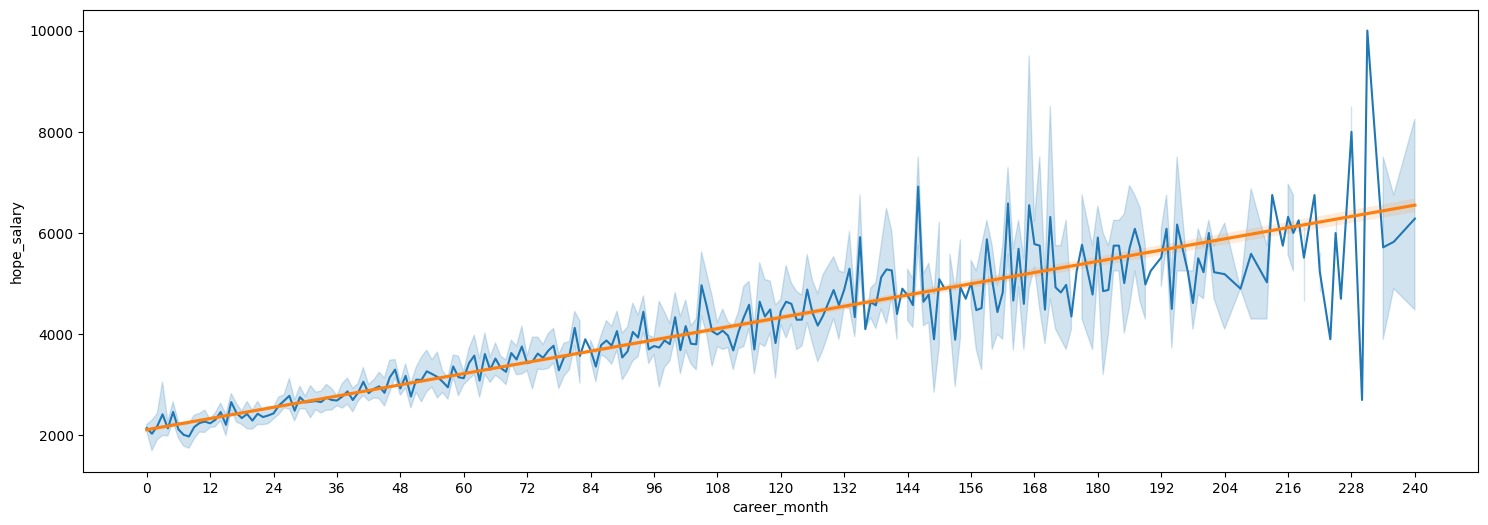

In [142]:
fig = plt.figure(figsize=(18, 6))

under_240_month = noZero_hope_salary[noZero_hope_salary['career_month'] <= 240]

max_month = under_240_month['career_month'].max()

plt.xticks(range(0, max_month + 1, 12))

sns.lineplot(data=under_240_month,x='career_month',y='hope_salary')

sns.regplot(data=under_240_month, x='career_month', y='hope_salary', scatter=False)

plt.show()

* 경력 월 수 최대 값이 399 이므로 240개월(20년)까지 데이터 확인
* 경력 월 수가 높을 수록 평균 연봉을 높게 희망하는 것으로 보인다.

##### Q3) job_code_seq1(희망직무1)에 따른 hope_salary(희망 연봉)이 차이가 있을까?

<ipython-input-143-c43c81c16dfb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noZero_hope_salary['job_code_seq1_english'] = noZero_hope_salary['job_code_seq1'].map(english_labels)


job_code_seq1_english
Construction/Machinery/Electrical/Electronics    2300.000000
Design                                           2694.531250
IT/Game                                          3500.000000
Management/Planning/Accounting/Admin             3063.137255
Materials/Chemicals/Fiber/Clothing               3433.327731
Sales                                            3314.130435
Specialty/Education/Qualification                3800.000000
Name: hope_salary, dtype: float64


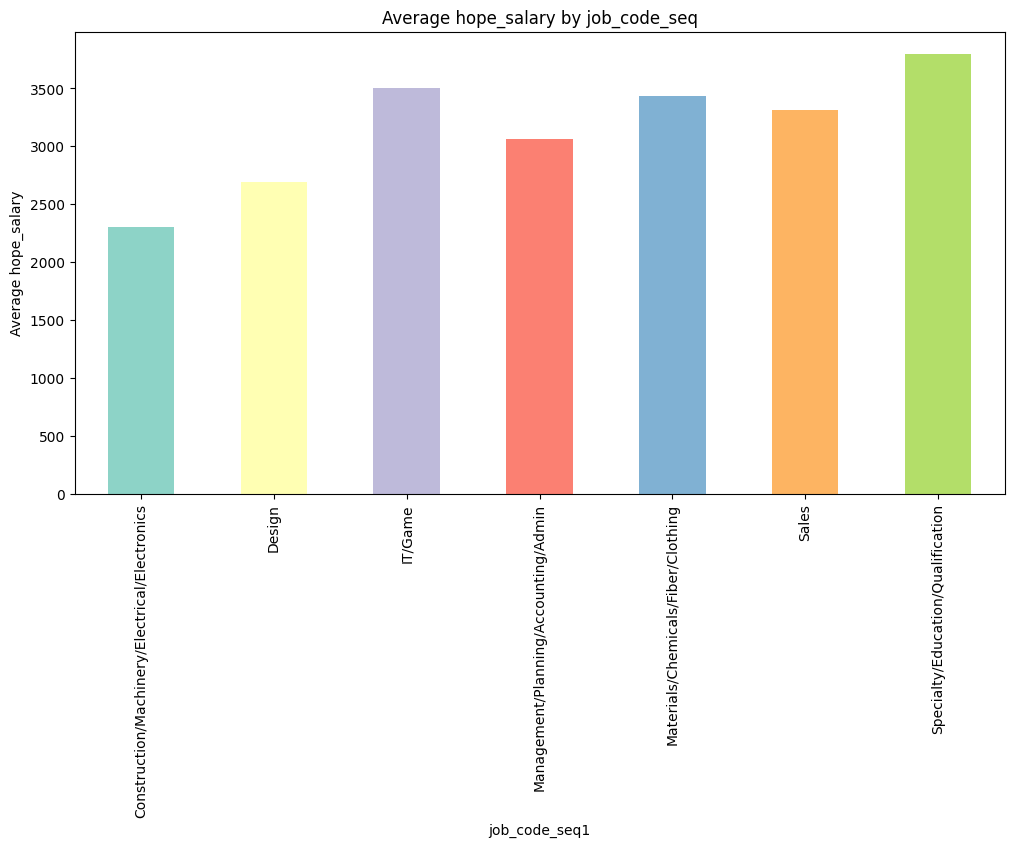

In [143]:
english_labels = {
    "재료·화학·섬유·의복": "Materials/Chemicals/Fiber/Clothing",
    "디자인": "Design",
    "경영·기획·회계·사무": "Management/Planning/Accounting/Admin",
    "영업·판매·TM": "Sales",
    "건설·기계·전기·전자": "Construction/Machinery/Electrical/Electronics",
    "전문·교육·자격": "Specialty/Education/Qualification",
    "기타 직종": "Other Jobs",
    "IT·게임": "IT/Game",
    "문화·예술·신문·방송": "Culture/Art/Newspaper/Broadcast"
}
noZero_hope_salary['job_code_seq1_english'] = noZero_hope_salary['job_code_seq1'].map(english_labels)

job_grouped = noZero_hope_salary.groupby('job_code_seq1_english')['hope_salary'].mean()

print(job_grouped)

plt.figure(figsize=(12, 6))
job_grouped.plot(kind='bar', color=sns.color_palette('Set3'))
plt.title('Average hope_salary by job_code_seq')
plt.xlabel('job_code_seq1')
plt.ylabel('Average hope_salary')
plt.show()

* '전문·교육·자격'직무에 희망하는 평균 hope_salary(희망 연봉이) 가장 높은 것을 알 수 있다.
* 그 다음으로 'IT·게임', '재료·화학·섬유·의복' 순으로 평균 희망 연봉이 높은 순이다.



##### Q4) Education(요규학위)이 높을수록 qualifications(자격요건난이도)가 높은가?

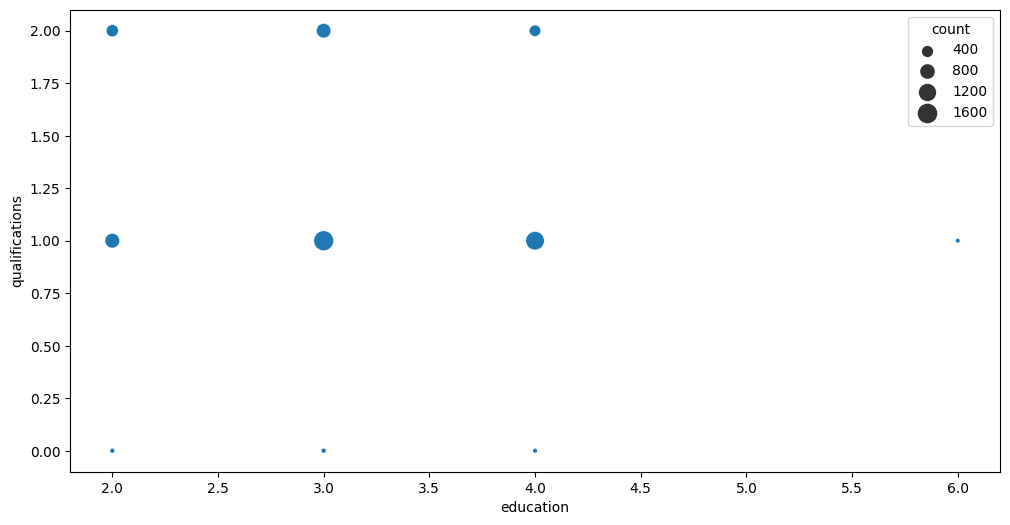

In [144]:
counts = recruitment_df.groupby(['education', 'qualifications']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=counts, x='education', y='qualifications', size='count', sizes=(10, 200))

plt.show()

* education(요구 학위)가 2, 3, 4 순으로 요구 학위가 높다고 가정
* 요구 학위가 높다고 자격 요건 난이도가 높은 것은 아니다.
* 모든 요구 학위에서 자격 요건 난이도는 '1'이 가장 많았다.

##### Q5) check_box_keyword(모집직무코드)가 많을 수록 employee(종업원 수, 규모)가 클까?

<Axes: xlabel='keyword_count', ylabel='employee'>

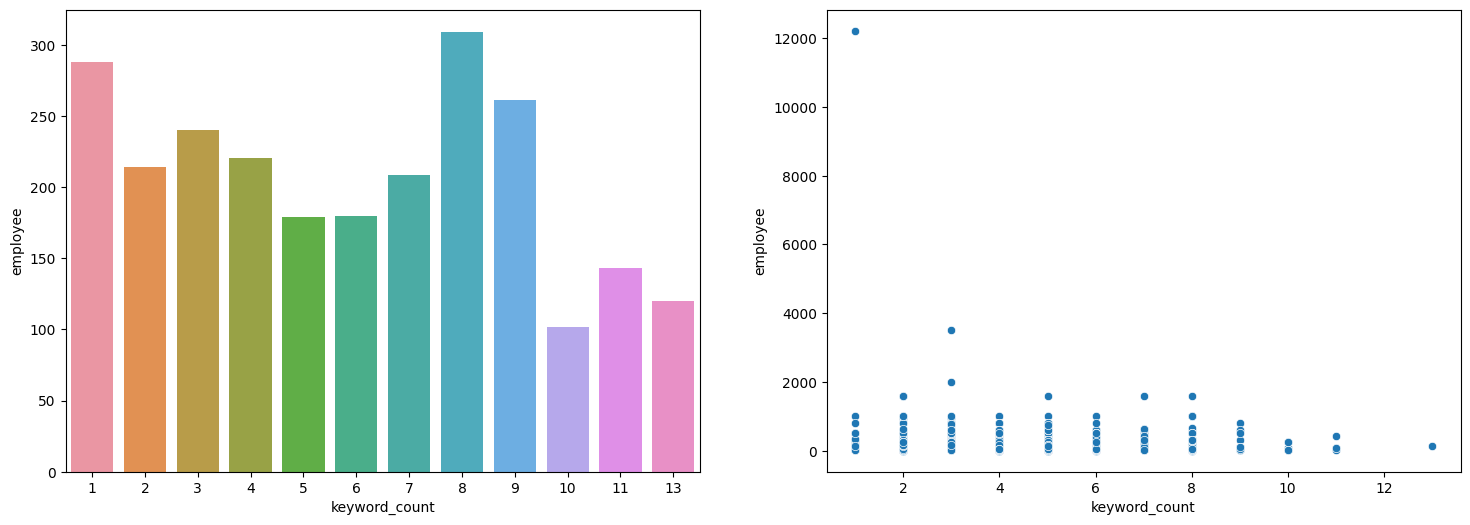

In [145]:
recruitment_df['check_box_keyword'] = recruitment_df['check_box_keyword'].astype(str).fillna('')

def count_semicolons(row):
    return row.count(';') + 1

recruitment_df['keyword_count'] = recruitment_df['check_box_keyword'].apply(count_semicolons)

merge_rec_com = pd.merge(recruitment_df, company_df, how='outer',on='recruitment_seq')

merge_rec_com.dropna(axis=0, subset=['employee'], inplace=True)

dc_grouped = merge_rec_com.groupby('keyword_count')['employee'].mean().reset_index()

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.barplot(data=dc_grouped, x='keyword_count', y='employee', ax=ax1)
sns.scatterplot(data=merge_rec_com, x='keyword_count', y='employee', ax=ax2)

* 모집 직무 코드가 많을수록 인원 수(회사 규모)가 큰 편은 아닌 것으로 보인다.
* 오히려 모집 직무 코드가 많을 수록 회사 규모는 작은 것을 알 수 있다.
* 모집 직무가 1개 일때 평균적으로는 회사 규모가 커 보이지만 12000명 이상의 인원 수 를 가진 데이터가 존재하여 정확한 지표를 나타내기엔 무리가 있다.

##### Q6) 졸업연도, 최종학력, 경력 월, 최종연봉(직전연봉), 희망연봉은 어떤 상관관계를 가지고 있을까?

<ipython-input-146-78f1366296d6>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_matrix, dtype=np.bool)


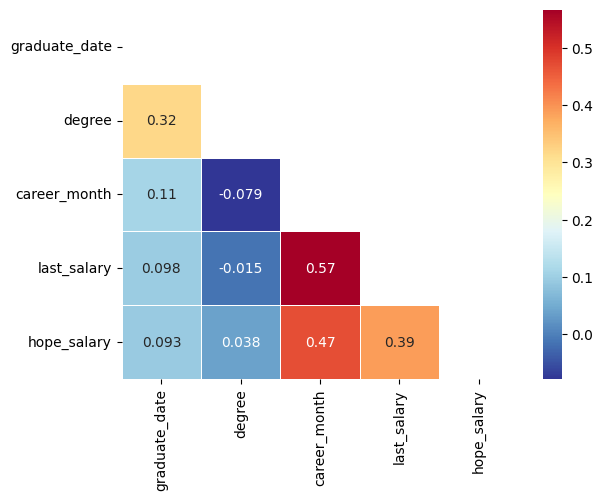

In [146]:
correlation_data = resume_df[['graduate_date', 'degree', 'career_month', 'last_salary', 'hope_salary']]

# 상관 관계 계산
correlation_matrix = correlation_data.corr()

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 생성
sns.heatmap(correlation_matrix, annot=True, mask=mask, linewidths=.5, cmap='RdYlBu_r')
plt.show()

* 최종연봉(직전연봉)과 경력 월이 가장 큰 상관 관계를 나타낸다.
* 그 다음으로 희망 연봉과 경력 월이 큰 상관 관계를 나타낸다.
* 최종 연봉과, 희망 연봉, 경력 월 이 3가지의 데이터는 다른 데이터에 비해 높은 상관 관계를 가지고 있다.